In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_excel("train.xlsx")
test=pd.read_excel("test.xlsx")

In [3]:
train.shape, test.shape

((11564, 34), (3857, 33))

In [4]:
#train['RepNumber'].replace(['1','2',], 3,inplace=True)
#test['Dependents'].replace('3+', 3,inplace=True)

In [5]:
train=train.dropna() 
test=test.dropna() 

In [6]:
df = train['DriverRating']
df = (df - df.min())/(df.max()-df.min())
train['DriverRating'] = df
df = train['ClaimSize']
df = (df - df.min())/(df.max()-df.min())
train['ClaimSize'] = df

df = test['DriverRating']
df = (df - df.min())/(df.max()-df.min())
test['DriverRating'] = df
df = test['ClaimSize']
df = (df - df.min())/(df.max()-df.min())
test['ClaimSize'] = df

In [7]:
# train['RepNumber'] = str(train['RepNumber'])
# test['RepNumber'] = str(test['RepNumber'])

In [8]:
train=train.drop(['Age','RepNumber','WeekOfMonth','DayOfWeek','DayOfWeekClaimed','WeekOfMonthClaimed','PolicyNumber','Year'],axis=1)
test=test.drop(['Age','RepNumber','WeekOfMonth','DayOfWeek','DayOfWeekClaimed','WeekOfMonthClaimed','PolicyNumber','Year'],axis=1)



In [9]:
# train['ClaimSize']

In [10]:
X = train.drop('FraudFound_P',1)
y = train.FraudFound_P
from sklearn import preprocessing

X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [11]:
for i in train.columns:
    if i not in test.columns:
        print(i)

FraudFound_P


In [12]:
from sklearn.model_selection import train_test_split
X_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
x_cv = scaler.transform(x_cv)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=100,
          penalty='l2', random_state=0, solver='newton-cg', tol=0.0001,
          verbose=1, warm_start=False)

pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.9396999422965955

In [21]:
from sklearn.model_selection import train_test_split
X_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
x_cv = scaler.transform(x_cv)


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=0, max_depth=1000,n_estimators=5)
model.fit(X_train, y_train)
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.9319099826889786

In [25]:
pred_test = model.predict(test)
sum(pred_test)

155

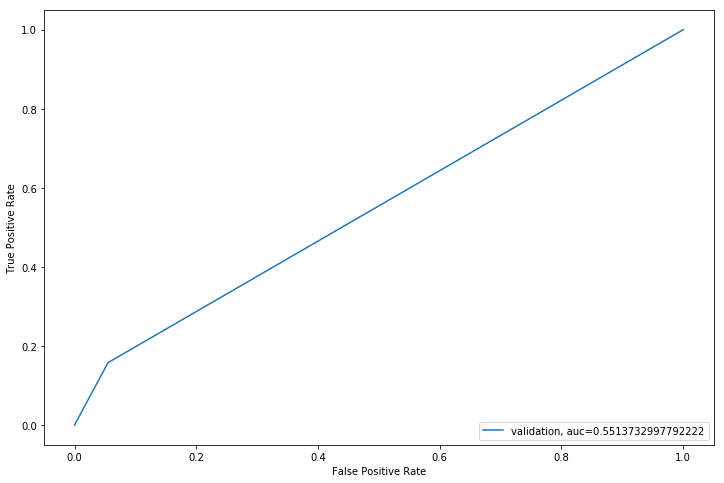

In [23]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(pred_cv,y_cv)
auc = metrics.roc_auc_score(pred_cv,y_cv)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [28]:
submission=pd.read_excel("test.xlsx")
submission['FraudFound_P']=pred_test
#submission['WeekOfMonth','DayOfWeek','DayOfWeekClaimed','WeekOfMonthClaimed','PolicyNumber','Year']=test_original['WeekOfMonth','DayOfWeek','DayOfWeekClaimed','WeekOfMonthClaimed','PolicyNumber','Year']
pd.DataFrame(submission, columns=['FraudFound_P']).to_excel('output.xlsx')


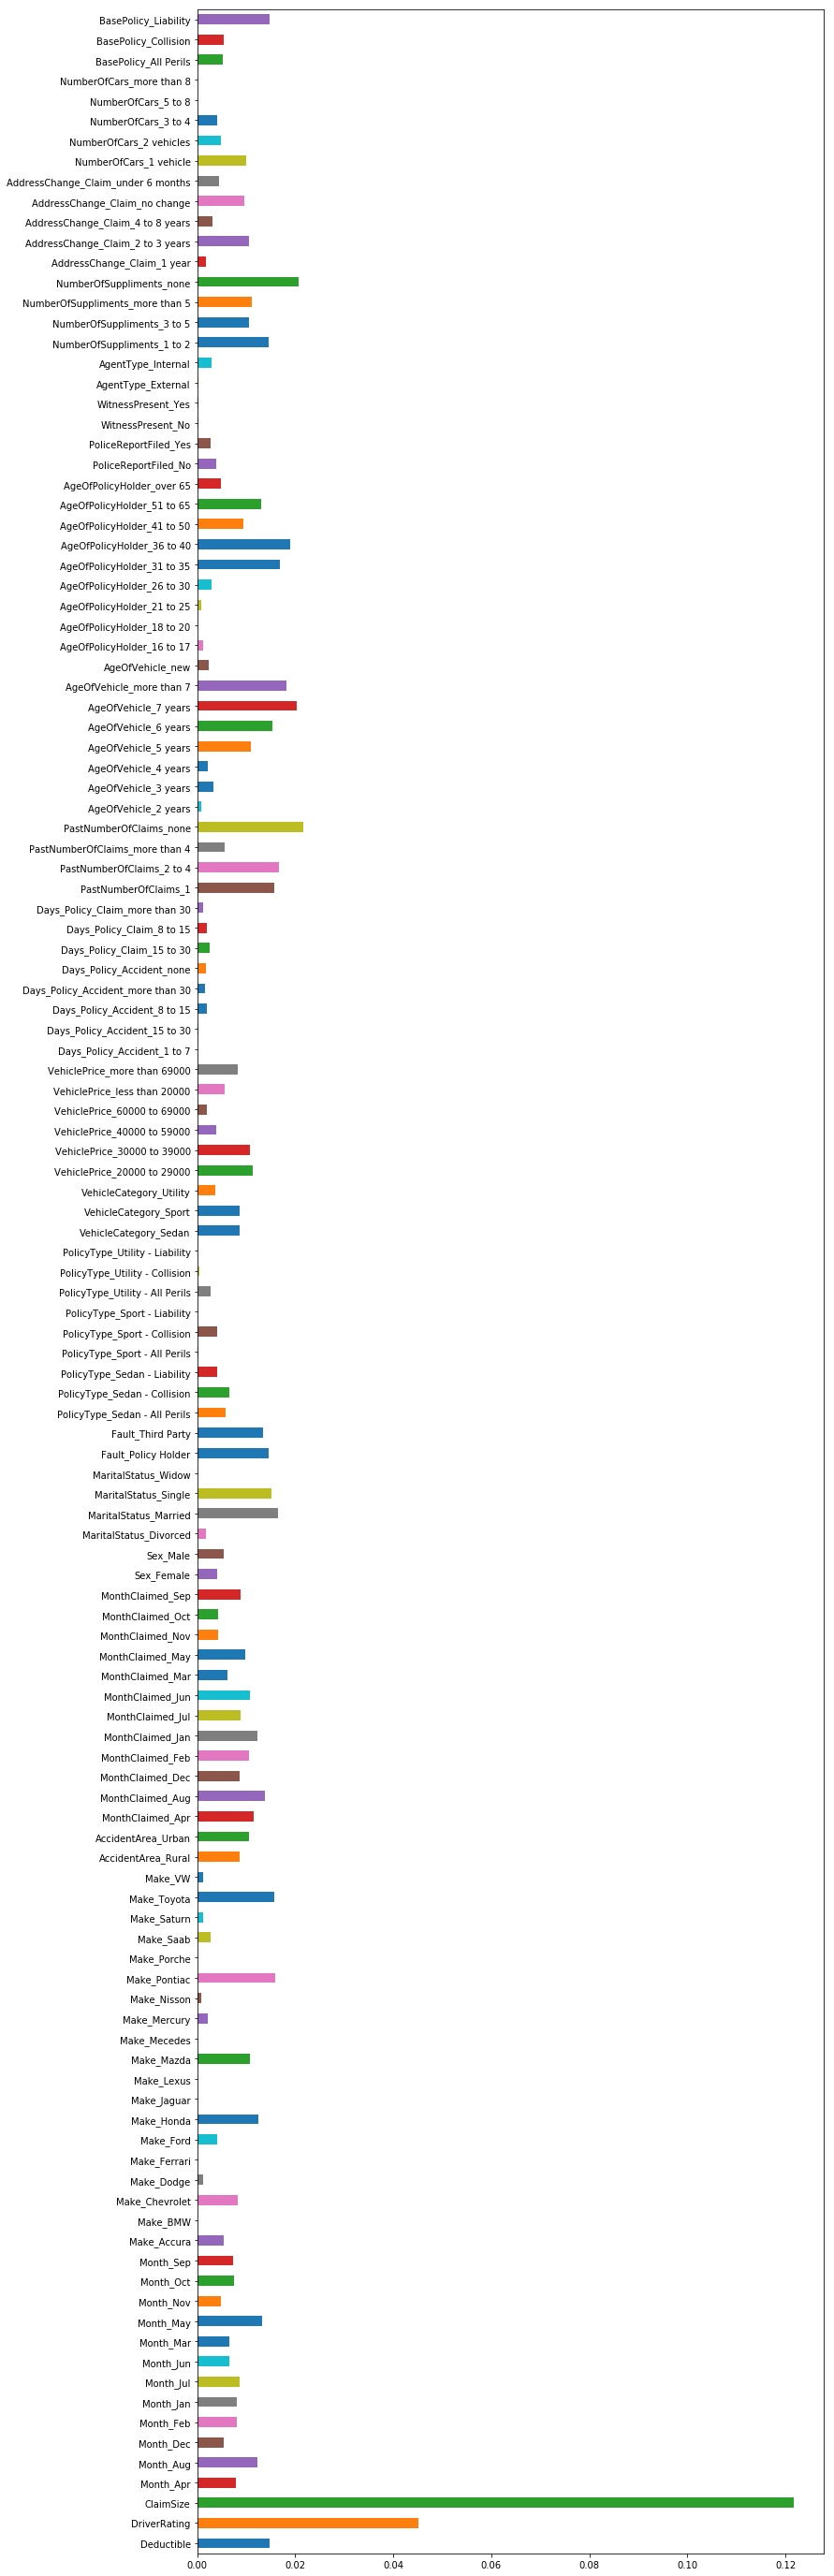

In [24]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,50))

In [18]:

# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: DriverRating         Importance: 0.11
Variable: Deductible           Importance: 0.05
Variable: Make_Ford            Importance: 0.02
Variable: Make_Nisson          Importance: 0.02
Variable: MonthClaimed_Jun     Importance: 0.02
Variable: MaritalStatus_Divorced Importance: 0.02
Variable: Fault_Policy Holder  Importance: 0.02
Variable: PastNumberOfClaims_1 Importance: 0.02
Variable: PastNumberOfClaims_more than 4 Importance: 0.02
Variable: AgeOfVehicle_5 years Importance: 0.02
Variable: AgeOfVehicle_6 years Importance: 0.02
Variable: AgeOfPolicyHolder_31 to 35 Importance: 0.02
Variable: NumberOfSuppliments_1 to 2 Importance: 0.02
Variable: NumberOfSuppliments_3 to 5 Importance: 0.02
Variable: NumberOfSuppliments_more than 5 Importance: 0.02
Variable: FraudFound_P         Importance: 0.01
Variable: ClaimSize            Importance: 0.01
Variable: Month_Apr            Importance: 0.01
Variable: Month_Aug            Importance: 0.01
Variable: Month_Dec            Importance: 0.01

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [19]:
# from sklearn.model_selection import GridSearchCV
# # Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
# paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

# grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

# from sklearn.model_selection import train_test_split
# x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# x_cv = scaler.transform(x_cv)

# # Fit the grid search model
# grid_search.fit(x_train,y_train)


In [20]:
# # Estimating the optimized value
# grid_search.best_estimator_

In [26]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_cv,pred_cv)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.06


In [27]:
metrics.r2_score(y_cv,pred_cv)

-0.2701628744411819